In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf #needed for models in this script
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
pd.set_option('html', True) #see the dataframe in a more user friendly manner
%matplotlib inline

## Overview of Web APIs

An application programmer interface (API) is an interface that allows two computer systems to easily exchange information. A client requests information from a server, the server processes the request, and sends a response to the client. The request can be to access data matching a particular criteria, in which case the response will contain the data requested. The request can also be to add data to the server's system. In this case, the response is a simple indication whether the data was successfully added.

You can think of this like a fast food window. You pull up and make a request at the window. You don't need to know what happens in the kitchen (and probably don't want to know). What you requested is delivered to you, and you go about your business. The same is true for an API.Most APIs use a standard URL string to carry the information necessary for the request. This usually involves:

* a service endpoint
* query parameters
* authentication tokens

Each API uses a different service endpoint. This will usually be the base URL for the request. Some APIs may only offer a single service, while others may offer many, requiring you to specify the service you wish to query. For example, the service endpoint for the Twitter search is "https://api.twitter.com/1.1/search/tweets.json". The first part ("https://api.twitter.com/") specifies the URL to access the service. The next part "1.1" specifies the API version being used. The service ("search") is indicated next, as is the target ("tweets"), and the desired return time ("json").

Query parameters usually begin at the end of the service endpoint and start with a "?". Parameters could include a particular user or term to be searched. It could also include a location. For example, given a area, you can search for tweets that were posted at or near that point. In the Foursquare API, that would look like this: "https://api.foursquare.com/v2/venues/search?intent=browse&v=20140625&ll=40.7021015456,-74.0122357117&radius=100&limit=50". In this case, the service endpoint for the venue search service is "https://api.foursquare.com/v2/venues/search". The parameters include:

* "intent=browse" - indicating we're browsing the venues for a given area
* "v=20140625" - indicating the version of the API we're intending to use
* "ll=40.7021015456,-74.0122357117" - indicating the location we want to query around
* "radius=100" - indicating the radius around the point we want to query
* "limit=50" - indicating the number of results to display (in most cases, there is a preset max number that can be returned per query)

Some APIs have a parameter known as "offset" that allow you to page through results. In this case, after we get the first 50 results, we can set the offset to 50 so we get the next 50 results from the service.

Notice how the parameters are combined together using the ampersand ("&"). While this tends to be the preferred method for combining search parameters, always check the documentation and find examples in order to construct your own API calls. You may need to prototype the calls in your text editor and run them in your browser before you run them in your code. This allows you to fix minor formatting errors.

Authentication tokens identify the application accessing the service. In some cases, the token is just a simple identifier so the service knows which user is accessing the system. In other cases, there is a more robust authentication system with multiple authentication tokens to not only identify the user but secure access to the system on that users behalf. Many APIs are free, but some, especially those run by commercial services, charge a fee for access. In some cases, this is based on usage or a flat fee for access.

In the following lesson, you will practice registering for access tokens, composing an API request, and submitting the API request with Python. Often the API requests can be complex and the responses full of information that needs to be parsed. While you can parse the data in a text editor, Python is far more powerful a tool and for making multiple requests, the ability to script tasks and run them in loop, makes the operation far easier than handling the requests by hand. Adding in the storage component in SQLite makes the task even easier.

Good Overview of APIs: https://zapier.com/learn/apis/

## Acquiring Weather Data from an API

For this assignment, we're going to be collecting the max temperature in 5 major cities in the US over the course of a month and find out which city experienced the largest temperature swings.

The five cities I picked to use are:   

* Austin,TX,30.303936,-97.754355
* Boston,MA,42.331960,-71.020173
* Miami,FL,25.775163,-80.208615
* Phoenix,AZ,33.572154,-112.090132
* Seattle,WA,47.620499,-122.350876

How you store the cities and locations is up to you, but a dictionary will allow you to store the values in a way that keeps them associated together:

In [3]:
# create dictionary:
cities = {'Austin':'30.303936,-97.754355',
          'Boston':'42.331960,-71.020173',
          'Miami':'25.775163,-80.208615',
          'Phoenix':'33.572154,-112.090132',
         'Seattle':'47.620499,-122.350876'}

cities

{'Austin': '30.303936,-97.754355',
 'Boston': '42.331960,-71.020173',
 'Miami': '25.775163,-80.208615',
 'Phoenix': '33.572154,-112.090132',
 'Seattle': '47.620499,-122.350876'}

<b>Note:</b> Storing the locations in a string will allow you to easily insert them into your API request.

## Getting Started

We'll be using the forecast.io API to get weather data. This API powers the Dark Sky mobile app and offers an easy to use interface. There are a number of weather APIs available online, including one from the National Oceanic and Atmospheric Adminstration (NOAA), but this one is by far the easiest to access and use. Like some commercial APIs, there are an initial number of free queries (in this case 1000 a day) before the service charges your account ($1 for the next 10,000). The assignment can be completed using the free service and you won't have to supply a credit card if you don't want to.

We're going to be querying an API using Python. To start off with, you'll need to get keys. Go to the registration page (https://developer.forecast.io/register) and request the keys. You should assign the API key to a variable in your code so you can use it in your request.

As every API is different, it's important to look over the API documentation (https://developer.forecast.io/docs/v2). This will give you the format and parameters for your queries.

Note the URL pattern for the API call:

![](files/weather1.jpg)

Note the format for time (https://developer.forecast.io/docs/v2#time_call), either Unix time or the format "YYYY-MM-DDThh:mm:ss".

## Challenge

<b>1.</b> Build the API call by combining the string elements in Python for your first city. You can use the datetime.datetime.now() function from the datetime package for the current datetime. You can use the datetime.timedelta() function to subtract or add time to a date. In this case, we'll be subtracting 30 days from the current date to get our start date and then iterating through until the present day. We do that like this start_date = datetime.datetime.now() - datetime.timedelta(days=30). This will subtract 30 days from the current day.

In [4]:
cities['Austin']

'30.303936,-97.754355'

In [5]:
import datetime
import time

Formating Time for API CALL:
* [YYYY]-[MM]-[DD]T[HH]:[MM]:[SS] (ex: 2013-05-06T12:00:00-0400)

In [6]:
api_key = '20643adc99f908dd1da0d3696eac75d8'

current_time = datetime.datetime.now()
sub_days = datetime.timedelta(days=30)

#create API call:
api_call = 'https://api.forecast.io/forecast/'+api_key+'/'+cities['Austin']+','+(current_time - sub_days).strftime('%Y-%m-%dT%H:%M:%S')

In [7]:
print api_call

https://api.forecast.io/forecast/20643adc99f908dd1da0d3696eac75d8/30.303936,-97.754355,2015-10-03T10:00:18


<b>2.</b> Test the call for your first city and make sure you have it formatted properly. You can start by just printing out the URL and pasting it into your browser before you use the requests package to do the call for you. This can help you troubleshoot any errors (though you can use the text and status_code attributes to also troubleshoot any errors)   
<b>3.</b> Once you have the URL formatted properly, issue the request from your code and inspect the result. How many levels does the data have? Which field do we want to save to get the daily maximum temperature?

In [8]:
import requests

In [9]:
weather_test = requests.get(api_call)

In [10]:
weather_test.json()

{u'currently': {u'apparentTemperature': 69.51,
  u'cloudCover': 0,
  u'dewPoint': 44.05,
  u'humidity': 0.4,
  u'icon': u'clear-day',
  u'precipIntensity': 0,
  u'precipProbability': 0,
  u'pressure': 1013.61,
  u'summary': u'Clear',
  u'temperature': 69.51,
  u'time': 1443884418,
  u'visibility': 10,
  u'windBearing': 82,
  u'windSpeed': 6.49},
 u'daily': {u'data': [{u'apparentTemperatureMax': 81.78,
    u'apparentTemperatureMaxTime': 1443906000,
    u'apparentTemperatureMin': 58.38,
    u'apparentTemperatureMinTime': 1443877200,
    u'cloudCover': 0.02,
    u'dewPoint': 43.42,
    u'humidity': 0.39,
    u'icon': u'clear-day',
    u'moonPhase': 0.71,
    u'precipIntensity': 0,
    u'precipIntensityMax': 0,
    u'precipProbability': 0,
    u'pressure': 1011.69,
    u'summary': u'Clear throughout the day.',
    u'sunriseTime': 1443875201,
    u'sunsetTime': 1443917754,
    u'temperatureMax': 84.51,
    u'temperatureMaxTime': 1443906000,
    u'temperatureMin': 58.38,
    u'temperatureMin

In [11]:
weather_test.json().keys()

[u'hourly',
 u'currently',
 u'longitude',
 u'flags',
 u'daily',
 u'offset',
 u'latitude',
 u'timezone']

In [12]:
print weather_test.json()['daily']['data'][0]

{u'apparentTemperatureMinTime': 1443877200, u'cloudCover': 0.02, u'temperatureMin': 58.38, u'summary': u'Clear throughout the day.', u'dewPoint': 43.42, u'apparentTemperatureMax': 81.78, u'temperatureMax': 84.51, u'temperatureMaxTime': 1443906000, u'windBearing': 48, u'moonPhase': 0.71, u'visibility': 10, u'sunsetTime': 1443917754, u'pressure': 1011.69, u'precipProbability': 0, u'apparentTemperatureMin': 58.38, u'precipIntensityMax': 0, u'icon': u'clear-day', u'apparentTemperatureMaxTime': 1443906000, u'humidity': 0.39, u'windSpeed': 4, u'time': 1443848400, u'precipIntensity': 0, u'sunriseTime': 1443875201, u'temperatureMinTime': 1443877200}


Save the daily max temperature in the 'daily' field, 'temperatureMax'

<b>4.</b> Based on the data sample, create the table in a SQLite database called "weather.db".

In [13]:
import sqlite3 as lite

con = lite.connect('weather.db')
cur = con.cursor()

Create table in 'weather.db':   
<b>Note:</b> I found the instructions very unclear in this lesson. I've finally figured it out by moving ahead in the lesson to determine I'm only supposed to create a table with one variable from within 'daily'. I assumed (incorrectly) that I was supposed to be capturing more data in the database for each city. 

In [14]:
with con:
    cur.execute('CREATE TABLE daily_max_temp (\
    day TIMESTAMP, Austin REAL, Boston REAL, Miami REAL, Phoenix REAL, Seattle REAL)')

In [15]:
print pd.read_sql_query('SELECT * FROM daily_max_temp', con)
# 'SELECT *' will bring the entire table, 'con' at the end references the connection to the database. 

Empty DataFrame
Columns: [day, Austin, Boston, Miami, Phoenix, Seattle]
Index: []


<b>5.</b>Write a script that takes each city and queries every day for the past 30 days (Hint: You can use the datetime.timedelta(days=1) to increment the value by day).  
<b>6.</b> Save the max temperature values to the table, keyed on the date. You can leave the date in Unix time or convert to a string.

In SQL, a row has to be inserted before it can be updated. In order to keep the code clean, we're going to iterate through the values in the range and insert them into the database without any other values:

In [16]:
query_date = current_time - sub_days # as above; returns 30 days. 

In [17]:
with con:
    while query_date < current_time:
        cur.execute('INSERT INTO daily_max_temp(day) VALUES (?)', [query_date.strftime('%Y-%m-%dT%H:%M:%S')],)
        query_date += datetime.timedelta(days=1)

In [35]:
print pd.read_sql_query('SELECT * FROM daily_max_temp', con).head()

                   day  Austin  Boston  Miami  Phoenix  Seattle
0  2015-10-03T10:00:18   84.51   54.13  86.96    90.44    63.79
1  2015-10-04T10:00:18   85.71   54.28  85.97    91.96    66.70
2  2015-10-05T10:00:18   83.36   59.01  84.50    83.09    67.12
3  2015-10-06T10:00:18   88.46   63.11  84.04    77.91    63.84
4  2015-10-07T10:00:18   89.90   69.85  84.26    80.83    61.02


Now we can loop through our cities and query the API:

In [33]:
for k,v in cities.iteritems(): #for each city and corresponding co-ordinates(lat & long) in the dict:
    url = 'https://api.forecast.io/forecast/'+api_key
    
    query_date = current_time - sub_days # as above; returns 30 days.
    
    while query_date < current_time:
        #query for the value
        r = requests.get(url + '/' + v + ',' + query_date.strftime('%Y-%m-%dT%H:%M:%S'))

        with con:
            #insert the temperature max to the database
            cur.execute('UPDATE daily_max_temp SET ' + str(k) + ' = ? WHERE day = ?', \
                        (r.json()['daily']['data'][0]['temperatureMax'], query_date.strftime('%Y-%m-%dT%H:%M:%S'),))

        #increment query_date to the next day for next operation of loop
        query_date += datetime.timedelta(days=1) #increment query_date to the next day


#con.close() # a good practice to close connection to database

2015-10-03 10:00:18.135000
2015-10-03 10:00:18.135000
2015-10-03 10:00:18.135000
2015-10-03 10:00:18.135000
2015-10-03 10:00:18.135000


In [34]:
print pd.read_sql_query('SELECT * FROM daily_max_temp', con)

                    day  Austin  Boston  Miami  Phoenix  Seattle
0   2015-10-03T10:00:18   84.51   54.13  86.96    90.44    63.79
1   2015-10-04T10:00:18   85.71   54.28  85.97    91.96    66.70
2   2015-10-05T10:00:18   83.36   59.01  84.50    83.09    67.12
3   2015-10-06T10:00:18   88.46   63.11  84.04    77.91    63.84
4   2015-10-07T10:00:18   89.90   69.85  84.26    80.83    61.02
5   2015-10-08T10:00:18   88.65   61.23  84.99    89.76    64.51
6   2015-10-09T10:00:18   86.07   69.74  85.51    93.06    66.51
7   2015-10-10T10:00:18   89.30   61.41  87.51    91.90    68.12
8   2015-10-11T10:00:18   94.35   67.86  84.93    95.28    63.37
9   2015-10-12T10:00:18   98.37   74.63  85.38    93.82    64.42
10  2015-10-13T10:00:18   92.63   70.16  84.51    96.13    59.80
11  2015-10-14T10:00:18   95.15   66.31  86.29    97.90    58.67
12  2015-10-15T10:00:18   93.49   60.58  85.10    94.99    63.94
13  2015-10-16T10:00:18   89.61   60.24  82.48    93.35    63.63
14  2015-10-17T10:00:18  

Now we have a database with the temperature information we want for 5 U.S. cities. 

## Analyzing Temperature Data

Just as you did with the Citi Bike data, go through the the sequence of temperature readings and calculate the change between days and find the greatest range in high temperatures in the month you measured. Which city had the greatest variation? What is the distribution of the difference? Does the result surprise you? Why or why not?

In [38]:
# turn database into a dataframe:
weather_frame = pd.read_sql_query('SELECT * FROM daily_max_temp', con)
weather_frame.head()

,day,Austin,Boston,Miami,Phoenix,Seattle
0,2015-10-03T10:00:18,84.51,54.13,86.96,90.44,63.79
1,2015-10-04T10:00:18,85.71,54.28,85.97,91.96,66.70
2,2015-10-05T10:00:18,83.36,59.01,84.50,83.09,67.12
3,2015-10-06T10:00:18,88.46,63.11,84.04,77.91,63.84
4,2015-10-07T10:00:18,89.90,69.85,84.26,80.83,61.02


In [39]:
# Transpose the dataframe:
weather_frame = weather_frame.T
weather_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
day,2015-10-03T10:00:18,2015-10-04T10:00:18,2015-10-05T10:00:18,2015-10-06T10:00:18,2015-10-07T10:00:18,2015-10-08T10:00:18,2015-10-09T10:00:18,2015-10-10T10:00:18,2015-10-11T10:00:18,2015-10-12T10:00:18,...,2015-10-23T10:00:18,2015-10-24T10:00:18,2015-10-25T10:00:18,2015-10-26T10:00:18,2015-10-27T10:00:18,2015-10-28T10:00:18,2015-10-29T10:00:18,2015-10-30T10:00:18,2015-10-31T10:00:18,2015-11-01T10:00:18
Austin,84.51,85.71,83.36,88.46,89.9,88.65,86.07,89.3,94.35,98.37,...,80.05,74.31,62.42,75.57,81.21,79.39,79.37,74.92,74.33,72.67
Boston,54.13,54.28,59.01,63.11,69.85,61.23,69.74,61.41,67.86,74.63,...,59.05,48.22,60.46,51.81,54.3,60.71,71.64,58.66,52.72,59.66
Miami,86.96,85.97,84.5,84.04,84.26,84.99,85.51,87.51,84.93,85.38,...,81.1,81.64,81.83,81.45,83.24,81.18,84.16,84.4,83.76,85.01
Phoenix,90.44,91.96,83.09,77.91,80.83,89.76,93.06,91.9,95.28,93.82,...,81.36,86.96,85.43,86.9,85.97,83.5,78.77,77.31,80.22,82.19


In [47]:
# Replace column headers with corresponding days
weather_frame.columns = weather_frame.iloc[0]

#drop the day row:
weather_frame = weather_frame.drop('day', axis=0)

weather_frame.head(1)

day,2015-10-03T10:00:18,2015-10-04T10:00:18,2015-10-05T10:00:18,2015-10-06T10:00:18,2015-10-07T10:00:18,2015-10-08T10:00:18,2015-10-09T10:00:18,2015-10-10T10:00:18,2015-10-11T10:00:18,2015-10-12T10:00:18,...,2015-10-24T10:00:18,2015-10-25T10:00:18,2015-10-26T10:00:18,2015-10-27T10:00:18,2015-10-28T10:00:18,2015-10-29T10:00:18,2015-10-30T10:00:18,2015-10-31T10:00:18,2015-11-01T10:00:18,range
Austin,84.51,85.71,83.36,88.46,89.9,88.65,86.07,89.3,94.35,98.37,...,74.31,62.42,75.57,81.21,79.39,79.37,74.92,74.33,72.67,35.95


<b>1.</b> Calculate the change between days and find the greatest range in high temperatures in the month you measured. Which city had the greatest variation?

In [48]:
weather_frame['range'] = (weather_frame.max(axis=1) - weather_frame.min(axis=1))
weather_frame

day,2015-10-03T10:00:18,2015-10-04T10:00:18,2015-10-05T10:00:18,2015-10-06T10:00:18,2015-10-07T10:00:18,2015-10-08T10:00:18,2015-10-09T10:00:18,2015-10-10T10:00:18,2015-10-11T10:00:18,2015-10-12T10:00:18,...,2015-10-24T10:00:18,2015-10-25T10:00:18,2015-10-26T10:00:18,2015-10-27T10:00:18,2015-10-28T10:00:18,2015-10-29T10:00:18,2015-10-30T10:00:18,2015-10-31T10:00:18,2015-11-01T10:00:18,range
Austin,84.51,85.71,83.36,88.46,89.9,88.65,86.07,89.3,94.35,98.37,...,74.31,62.42,75.57,81.21,79.39,79.37,74.92,74.33,72.67,35.95
Boston,54.13,54.28,59.01,63.11,69.85,61.23,69.74,61.41,67.86,74.63,...,48.22,60.46,51.81,54.3,60.71,71.64,58.66,52.72,59.66,29.71
Miami,86.96,85.97,84.5,84.04,84.26,84.99,85.51,87.51,84.93,85.38,...,81.64,81.83,81.45,83.24,81.18,84.16,84.4,83.76,85.01,6.74
Phoenix,90.44,91.96,83.09,77.91,80.83,89.76,93.06,91.9,95.28,93.82,...,86.96,85.43,86.9,85.97,83.5,78.77,77.31,80.22,82.19,24.34
Seattle,63.79,66.7,67.12,63.84,61.02,64.51,66.51,68.12,63.37,64.42,...,56.88,63.49,56.31,60.01,56.6,60.22,64.12,59.93,54.21,13.91


The city with the greatest variation was Austin, with a range of 35.95 degress over the month. 

<b>2.</b> What is the distribution of the difference? 

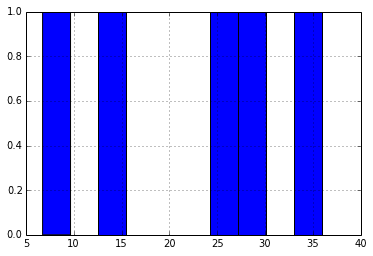

In [53]:
weather_frame['range'].hist()
plt.show()